# Normalization
The strong amplitude of a large earthquake existing in the seismic record is an interference for calculating the dispersion spectrum. The normalization of the original data is to normalize the noise amplitude to eliminate strong amplitude interference and its method is called 1bit normalization before this treatment, traces must be demeaned, detrended and filtered in order to get better data processing result(Bensen, 2007). One bit normalization which retains only the sign of the raw signal by replacing all positive amplitudes with a 1 and all negative amplitudes with a −1. This method has been used in a number of seismic studies and proven to be very effective. There are five normalization methods (1bit, ramn, clipping, clipping iteration, automatic detection normalization method). 

In [63]:
import numpy as np
import obspy as ob
from obspy import UTCDateTime

t1= UTCDateTime('2012-01-01T06:00:00')
t2= UTCDateTime('2012-01-01T06:10:00')

st=ob.read("TA.J36A..BHZ__20120101T000000Z__20120102T000000Z.mseed")
st += ob.read("TA.J36A..BHZ__20120102T000000Z__20120103T000000Z.mseed")
st += ob.read("TA.J36A..BHZ__20120103T000000Z__20120104T000000Z.mseed")

In [64]:
sta=st.copy()
sta.detrend("linear")
sta.trim(t1,t2)
sta.taper(max_percentage=0.05, type='cosine')                    
sta.filter('bandpass', freqmin=0.1, freqmax=0.2, zerophase=True)

1 Trace(s) in Stream:
TA.J36A..BHZ | 2012-01-01T06:00:00.000000Z - 2012-01-01T06:10:00.000000Z | 40.0 Hz, 24001 samples

In [65]:
print(st[0].stats)

         network: TA
         station: J36A
        location: 
         channel: BHZ
       starttime: 2012-01-01T00:00:00.000000Z
         endtime: 2012-01-02T00:00:57.500000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 3458301
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 1294, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 5300224})


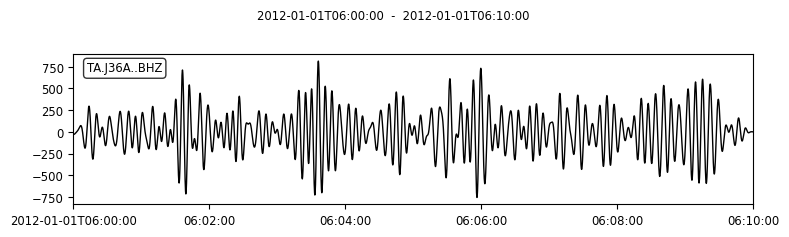

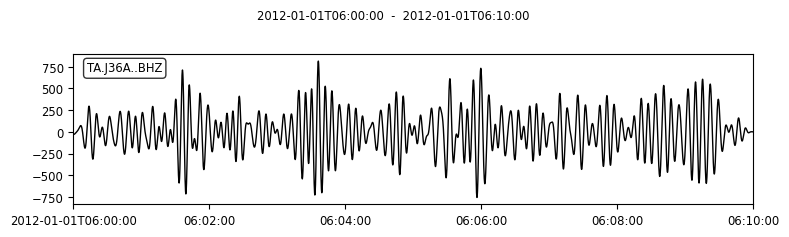

In [66]:
sta.plot()

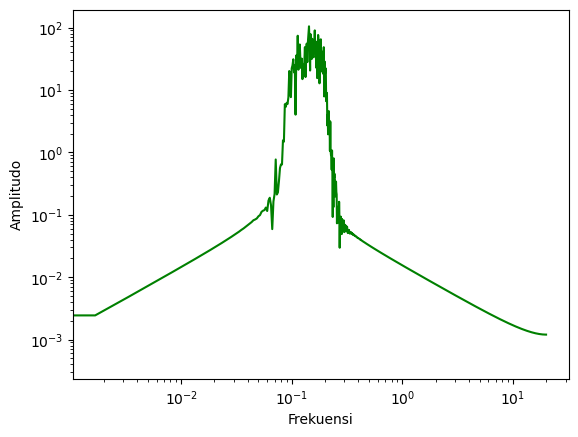

In [67]:
import matplotlib.pyplot as plt
import scipy.fftpack

def fourier(tr):
    
    dt = tr.stats.delta
    npts = tr.stats.npts
    
    
    yf = scipy.fftpack.fft(tr)
    xf = np.linspace(0.0, 1.0/(2.0*dt), int(npts/2))
    
    plt.figure()
    plt.plot(xf, 2.0/npts * np.abs(yf[:int(npts/2)]),color='green')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Frekuensi')
    plt.ylabel('Amplitudo')
    plt.show()

ex=sta.copy()
for tr in ex:
    tr = fourier(tr)

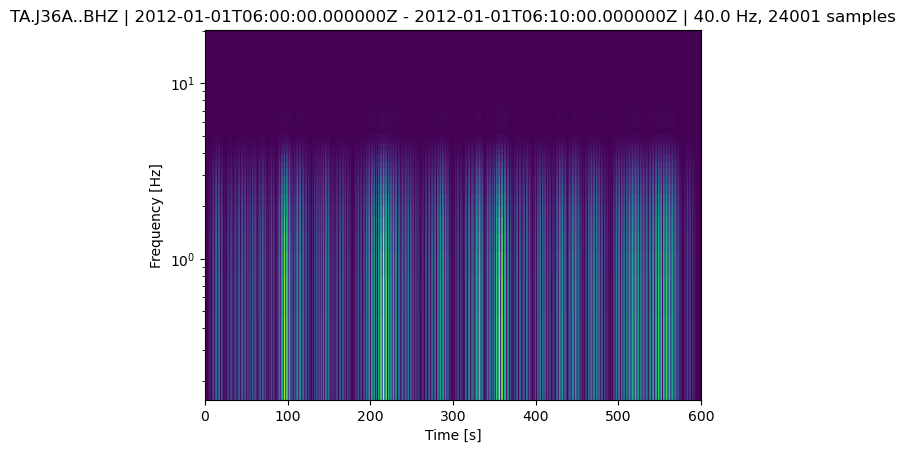

[None]

In [68]:
sta.spectrogram(log=True)

In [69]:
stb = sta.copy()                            # copy stream

stb.normalize(global_max=True)

1 Trace(s) in Stream:
TA.J36A..BHZ | 2012-01-01T06:00:00.000000Z - 2012-01-01T06:10:00.000000Z | 40.0 Hz, 24001 samples

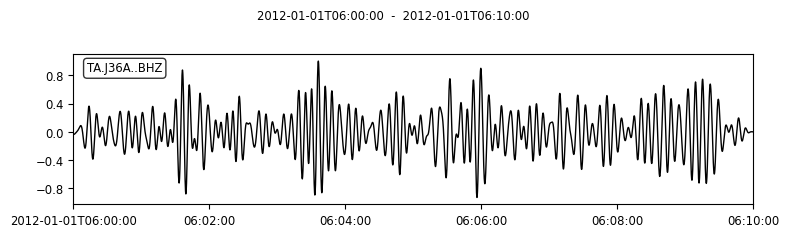

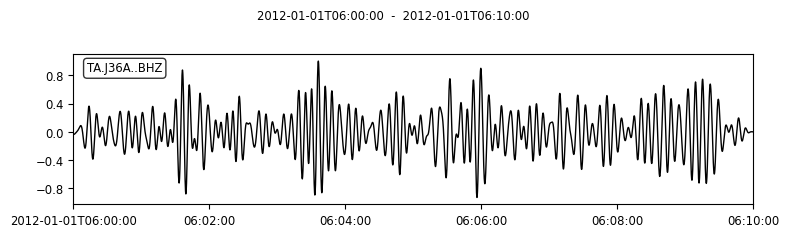

In [70]:
stb.plot()

In [71]:
stb1=sta.copy()
def norm (tr):
    tr == "1bit"
    tr.data = np.sign(tr.data)
    tr.data = np.float32(tr.data)

    return tr

In [72]:
stb1 = sta.copy()                            # copy stream

for tr in stb1:
    tr = norm(tr)

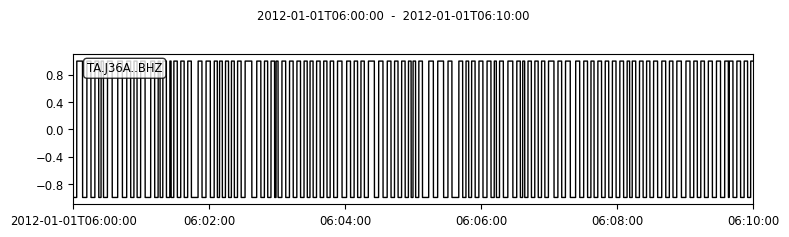

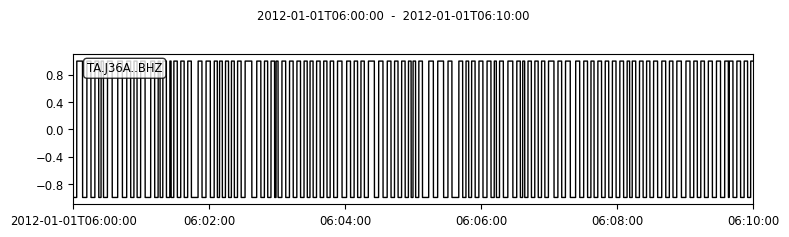

In [73]:
tr.plot()

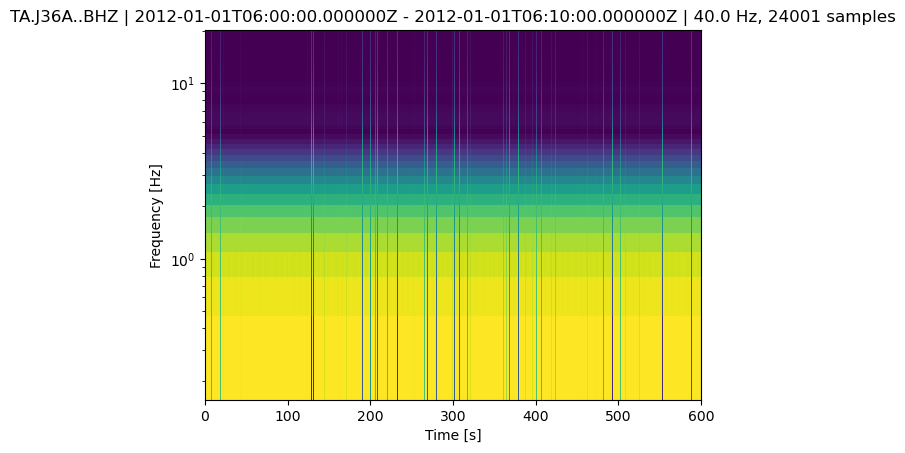

[None]

In [74]:
stb1.spectrogram(log=True)

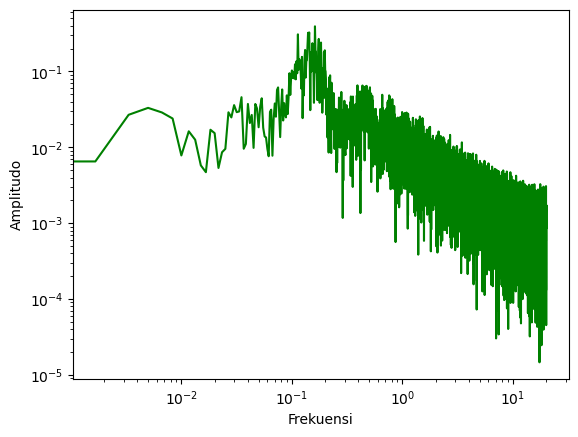

In [75]:

import matplotlib.pyplot as plt
import scipy.fftpack

def fourier(tr):
    
    dt = tr.stats.delta
    npts = tr.stats.npts
    
    
    yf = scipy.fftpack.fft(tr)
    xf = np.linspace(0.0, 1.0/(2.0*dt), int(npts/2))
    
    plt.figure()
    plt.plot(xf, 2.0/npts * np.abs(yf[:int(npts/2)]),color='green')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Frekuensi')
    plt.ylabel('Amplitudo')
    plt.show()

ex=stb1.copy()
for tr in ex:
    tr = fourier(tr)